Task Goal
Calculate the probability of being born in Canada in a particular year, using World Bank data on:

- Birth Rate (SP.DYN.CBRT.IN) → births per 1,000 people

- Total Population (SP.POP.TOTL) → total country population per year

births = (birth_rate / 1000) * population
probability = births_canada / births_world

#### Fetch Data, world population and birth rate

In [85]:
# fetch birth rate for all countries
import wbgapi as wb
import pandas as pd
import pprint

# population fetch
time=range(1960,2025)
economy='all'
series_totl_pop='SP.POP.TOTL'


totl_pop_country_wise_dump = wb.data.DataFrame(series_totl_pop,economy=economy,time=time,labels=True).reset_index()
print(totl_pop_country_wise_dump.head())
# pprint.pprint(totl_pop_country_wise_dump.head())

  economy                Country     YR1960     YR1961     YR1962     YR1963  \
0     ZWE               Zimbabwe  3809389.0  3930401.0  4055959.0  4185877.0   
1     ZMB                 Zambia  3153729.0  3254086.0  3358099.0  3465907.0   
2     YEM            Yemen, Rep.  5532301.0  5655232.0  5782221.0  5911135.0   
3     PSE     West Bank and Gaza        NaN        NaN        NaN        NaN   
4     VIR  Virgin Islands (U.S.)    32500.0    34300.0    35000.0    39800.0   

      YR1964     YR1965     YR1966     YR1967  ...      YR2015      YR2016  \
0  4320006.0  4458462.0  4601217.0  4748307.0  ...  14399013.0  14600294.0   
1  3577017.0  3692086.0  3812003.0  3936343.0  ...  16399089.0  16914423.0   
2  6048006.0  6195593.0  6351494.0  6516444.0  ...  31159379.0  32109010.0   
3        NaN        NaN        NaN        NaN  ...   4270092.0   4367088.0   
4    40800.0    43500.0    46200.0    49100.0  ...    107712.0    107516.0   

       YR2017      YR2018      YR2019      YR2020 

In [86]:
#condition population data
totl_pop_country_wise = totl_pop_country_wise_dump.melt(
    id_vars=['economy','Country'],
    var_name='year',
    value_name='population'
)
totl_pop_country_wise.columns=['code','country','year','population']
totl_pop_country_wise['year']=totl_pop_country_wise['year'].str.replace('YR','').astype(int)
print(totl_pop_country_wise.head())
print(len(totl_pop_country_wise))

totl_pop_by_year = totl_pop_country_wise.groupby('year')['population'].sum().reset_index()
print(totl_pop_by_year.head())

  code                country  year  population
0  ZWE               Zimbabwe  1960   3809389.0
1  ZMB                 Zambia  1960   3153729.0
2  YEM            Yemen, Rep.  1960   5532301.0
3  PSE     West Bank and Gaza  1960         NaN
4  VIR  Virgin Islands (U.S.)  1960     32500.0
17290
   year    population
0  1960  3.046620e+10
1  1961  3.088985e+10
2  1962  3.146031e+10
3  1963  3.216525e+10
4  1964  3.287651e+10


In [87]:
# fetch birth rate data
time=range(1960,2025)
economy='all'
series2='SP.DYN.CBRT.IN'

birth_rate_country_wise_dump = wb.data.DataFrame(series=series2,economy=economy,time=time,labels=True).reset_index()
print(birth_rate_country_wise_dump.head())

  economy                Country  YR1960  YR1961  YR1962  YR1963  YR1964  \
0     ZWE               Zimbabwe  47.492  47.292  47.093  46.821  46.557   
1     ZMB                 Zambia  48.947  48.922  48.870  48.943  48.851   
2     YEM            Yemen, Rep.  56.016  56.195  56.337  56.512  56.763   
3     PSE     West Bank and Gaza     NaN     NaN     NaN     NaN     NaN   
4     VIR  Virgin Islands (U.S.)  35.000  34.620  34.240  33.860  33.480   

   YR1965  YR1966  YR1967  ...  YR2015  YR2016  YR2017  YR2018  YR2019  \
0  46.375  46.060  45.822  ...  33.918  32.704  31.813  31.327  31.121   
1  48.837  48.789  48.799  ...  37.344  36.617  35.938  35.464  35.006   
2  56.803  56.852  56.823  ...  35.938  36.034  36.067  36.046  35.947   
3     NaN     NaN     NaN  ...  32.870  32.274  31.432  30.529  29.708   
4  33.100  32.700  32.300  ...  13.200  13.000  12.800  12.600  12.300   

   YR2020  YR2021  YR2022  YR2023  YR2024  
0  30.988  30.932  30.882  30.410     NaN  
1  34.408 

There is a data of INX having NaN for birthrate, same is replaced with mean() of the entire column in order to keep the birthrate newtral.

In [88]:
# condition population data
birth_rate_country_wise = birth_rate_country_wise_dump.melt(
    id_vars=['economy','Country'],
    var_name='year',
    value_name='birthrate'
)
birth_rate_country_wise.columns=['code','country','year','birthrate']
birth_rate_country_wise['year']=birth_rate_country_wise['year'].str.replace('YR','').astype(int)
print(birth_rate_country_wise.head())
print(len(birth_rate_country_wise))
na_count = birth_rate_country_wise.isna().sum().reset_index()
print(na_count)
print(birth_rate_country_wise[birth_rate_country_wise.isna().any(axis=1)])
# if(birth_rate_country_wise[birth_rate_country_wise['code']=='INX']):
birth_rate_country_wise['birthrate']= birth_rate_country_wise['birthrate'].fillna(birth_rate_country_wise['birthrate'].mean())

  code                country  year  birthrate
0  ZWE               Zimbabwe  1960     47.492
1  ZMB                 Zambia  1960     48.947
2  YEM            Yemen, Rep.  1960     56.016
3  PSE     West Bank and Gaza  1960        NaN
4  VIR  Virgin Islands (U.S.)  1960     35.000
17290
       index    0
0       code    0
1    country    0
2       year    0
3  birthrate  360
      code                         country  year  birthrate
3      PSE              West Bank and Gaza  1960        NaN
230    INX                  Not classified  1960        NaN
269    PSE              West Bank and Gaza  1961        NaN
496    INX                  Not classified  1961        NaN
535    PSE              West Bank and Gaza  1962        NaN
...    ...                             ...   ...        ...
17285  CEB  Central Europe and the Baltics  2024        NaN
17286  CSS          Caribbean small states  2024        NaN
17287  ARB                      Arab World  2024        NaN
17288  AFW      Africa

Store data in sqlite database for futher calculations

In [89]:
#create data base, and create tables to store population and birthrate data
import sqlite3

conn = sqlite3.connect('mapleroot.db',isolation_level=None)
totl_pop_country_wise.to_sql('tbl_totl_county_pop',conn,if_exists='replace',index='False')
totl_pop_by_year.to_sql('tbl_totl_pop',conn,if_exists='replace',index=False)
birth_rate_country_wise.to_sql('tbl_br_cnt',conn,if_exists='replace',index=False)
print(conn.execute('SELECT name FROM sqlite_schema WHERE type="table"').fetchall())
print(conn.execute('PRAGMA TABLE_INFO("tbl_totl_pop")').fetchall())
print(conn.execute('PRAGMA TABLE_INFO("tbl_br_cnt")').fetchall())
conn.close()

[('tbl_maple_roots',), ('tbl_totl_county_pop',), ('tbl_totl_pop',), ('tbl_br_cnt',)]
[(0, 'year', 'INTEGER', 0, None, 0), (1, 'population', 'REAL', 0, None, 0)]
[(0, 'code', 'TEXT', 0, None, 0), (1, 'country', 'TEXT', 0, None, 0), (2, 'year', 'INTEGER', 0, None, 0), (3, 'birthrate', 'REAL', 0, None, 0)]


In [90]:
# create a table for Canada, code, year, C_birthrate, w_birthrate, c_pop, w_pop, c_ttl_birth, w_ttl_birth, c_probability
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
quary = 'SELECT * FROM tbl_br_cnt'
df_br_sql = pd.read_sql(quary,conn)
# print(df_br_sql.head())

quary = 'SELECT * FROM tbl_totl_pop'
df_ttl_pop_sql = pd.read_sql(quary,conn)
# print(df_ttl_pop_sql)

df_maple_roots = df_br_sql[df_br_sql['code']=='CAN'].reset_index()
# print(len(df_maple_roots))
# print(df_maple_roots.columns)

df_maple_roots.rename(columns={"birthrate":"c_birthyear"},inplace=True)

# column: c_pop
quary = 'SELECT * FROM tbl_totl_county_pop WHERE code="CAN"'
df_can_pop = pd.read_sql(quary,conn)
# print(df_can_pop.head())
df_maple_roots = df_maple_roots.merge(
    df_can_pop[['code','year','population']],
    on=['code','year'],
    how='left'
)
df_maple_roots.rename(columns={'population':'c_population'},inplace=True)
print(df_maple_roots.head())
conn.close()



   index code country  year  c_birthyear  c_population
0    181  CAN  Canada  1960         26.7    17909356.0
1    447  CAN  Canada  1961         26.0    18271000.0
2    713  CAN  Canada  1962         25.2    18614000.0
3    979  CAN  Canada  1963         24.6    18964000.0
4   1245  CAN  Canada  1964         23.4    19325000.0


In [91]:
# add world birth rate from table tbl_br_cnt
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
quary = 'SELECT year, AVG(birthrate) AS w_birthrate FROM tbl_br_cnt GROUP BY year'
w_birthrate_df = pd.read_sql(quary,conn)
print(w_birthrate_df.head())
df_maple_roots = df_maple_roots.merge(
    w_birthrate_df[['year','w_birthrate']],
    on=['year'],
    how='left'
)
print(df_maple_roots.head())
conn.close()

   year  w_birthrate
0  1960    37.979542
1  1961    37.607086
2  1962    37.745164
3  1963    37.596513
4  1964    37.084510
   index code country  year  c_birthyear  c_population  w_birthrate
0    181  CAN  Canada  1960         26.7    17909356.0    37.979542
1    447  CAN  Canada  1961         26.0    18271000.0    37.607086
2    713  CAN  Canada  1962         25.2    18614000.0    37.745164
3    979  CAN  Canada  1963         24.6    18964000.0    37.596513
4   1245  CAN  Canada  1964         23.4    19325000.0    37.084510


In [92]:
# add world population from table tbl_totl_pop
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
quary = 'SELECT year, population as w_population FROM tbl_totl_pop'
totl_pop_df = pd.read_sql(quary,conn)
print(totl_pop_df.head())
df_maple_roots = df_maple_roots.merge(
    totl_pop_df[['year','w_population']],
    on=['year'],
    how='left'
)
print(df_maple_roots.head())
conn.close()

   year  w_population
0  1960  3.046620e+10
1  1961  3.088985e+10
2  1962  3.146031e+10
3  1963  3.216525e+10
4  1964  3.287651e+10
   index code country  year  c_birthyear  c_population  w_birthrate  \
0    181  CAN  Canada  1960         26.7    17909356.0    37.979542   
1    447  CAN  Canada  1961         26.0    18271000.0    37.607086   
2    713  CAN  Canada  1962         25.2    18614000.0    37.745164   
3    979  CAN  Canada  1963         24.6    18964000.0    37.596513   
4   1245  CAN  Canada  1964         23.4    19325000.0    37.084510   

   w_population  
0  3.046620e+10  
1  3.088985e+10  
2  3.146031e+10  
3  3.216525e+10  
4  3.287651e+10  


In [93]:
# correct error on column name
df_maple_roots.rename(columns={'c_birthyear':'c_birthrate'},inplace=True)
print(df_maple_roots.head())

   index code country  year  c_birthrate  c_population  w_birthrate  \
0    181  CAN  Canada  1960         26.7    17909356.0    37.979542   
1    447  CAN  Canada  1961         26.0    18271000.0    37.607086   
2    713  CAN  Canada  1962         25.2    18614000.0    37.745164   
3    979  CAN  Canada  1963         24.6    18964000.0    37.596513   
4   1245  CAN  Canada  1964         23.4    19325000.0    37.084510   

   w_population  
0  3.046620e+10  
1  3.088985e+10  
2  3.146031e+10  
3  3.216525e+10  
4  3.287651e+10  


### calculation
total Canada birth, total world birth, then calculate probability of birth in Canada compared to world

In [94]:
# calculate total birth in Canada
df_maple_roots['c_birth'] = (df_maple_roots['c_birthrate'] * df_maple_roots['c_population'])/1000
df_maple_roots['w_birth'] = (df_maple_roots['w_birthrate'] * df_maple_roots['w_population'])/1000
df_maple_roots['c_probability'] = (df_maple_roots['c_birth'] / df_maple_roots['w_birth'])
print(df_maple_roots.head())

   index code country  year  c_birthrate  c_population  w_birthrate  \
0    181  CAN  Canada  1960         26.7    17909356.0    37.979542   
1    447  CAN  Canada  1961         26.0    18271000.0    37.607086   
2    713  CAN  Canada  1962         25.2    18614000.0    37.745164   
3    979  CAN  Canada  1963         24.6    18964000.0    37.596513   
4   1245  CAN  Canada  1964         23.4    19325000.0    37.084510   

   w_population      c_birth       w_birth  c_probability  
0  3.046620e+10  478179.8052  1.157092e+09       0.000413  
1  3.088985e+10  475046.0000  1.161677e+09       0.000409  
2  3.146031e+10  469072.8000  1.187474e+09       0.000395  
3  3.216525e+10  466514.4000  1.209301e+09       0.000386  
4  3.287651e+10  452205.0000  1.219209e+09       0.000371  


C:\Users\shaik\AppData\Local\Temp\ipykernel_8840\2045626642.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


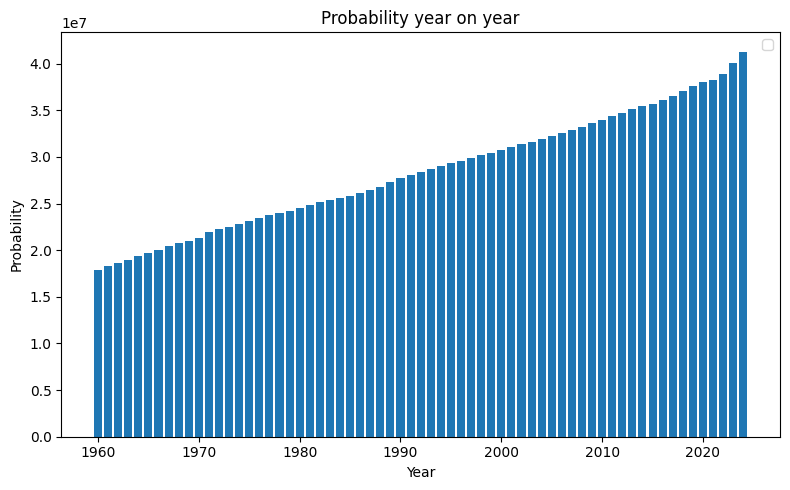

In [95]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_maple_roots['year'], df_maple_roots['c_population'])

plt.title("Probability year on year")
plt.ylabel("Probability")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

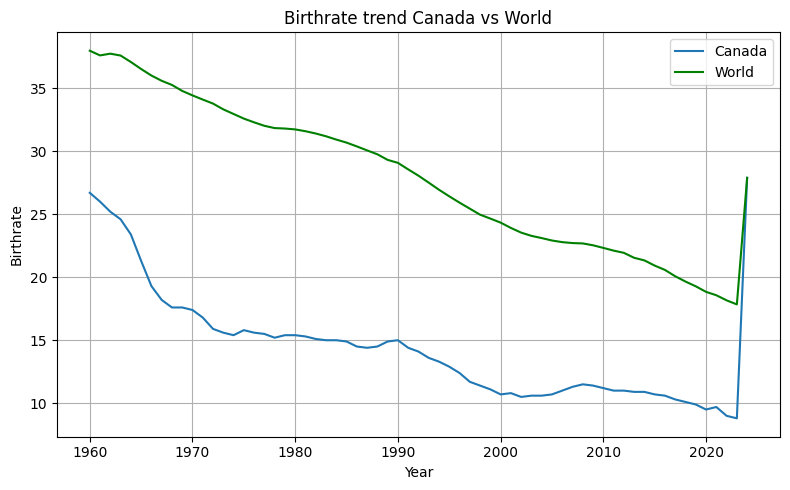

In [96]:
plt.figure(figsize=(8,5))
plt.plot(df_maple_roots['year'],df_maple_roots['c_birthrate'],label=df_maple_roots['country'].iloc[0])
plt.plot(df_maple_roots['year'],df_maple_roots['w_birthrate'],label='World',color='green')

plt.title("Birthrate trend Canada vs World")
plt.ylabel("Birthrate")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
# calculate percentage of growth
df_maple_roots['c_birth_growth'] = df_maple_roots['c_birth'].pct_change()
print(df_maple_roots.head())

   index code country  year  c_birthrate  c_population  w_birthrate  \
0    181  CAN  Canada  1960         26.7    17909356.0    37.979542   
1    447  CAN  Canada  1961         26.0    18271000.0    37.607086   
2    713  CAN  Canada  1962         25.2    18614000.0    37.745164   
3    979  CAN  Canada  1963         24.6    18964000.0    37.596513   
4   1245  CAN  Canada  1964         23.4    19325000.0    37.084510   

   w_population      c_birth       w_birth  c_probability  c_birth_growth  
0  3.046620e+10  478179.8052  1.157092e+09       0.000413             NaN  
1  3.088985e+10  475046.0000  1.161677e+09       0.000409       -0.006554  
2  3.146031e+10  469072.8000  1.187474e+09       0.000395       -0.012574  
3  3.216525e+10  466514.4000  1.209301e+09       0.000386       -0.005454  
4  3.287651e+10  452205.0000  1.219209e+09       0.000371       -0.030673  


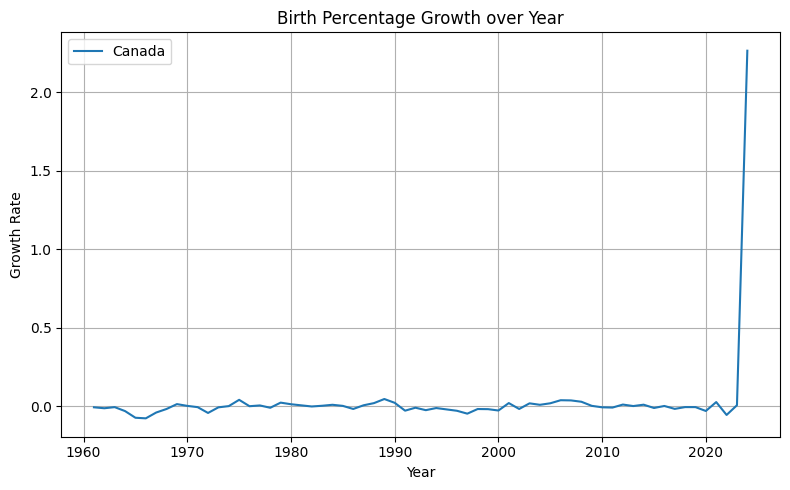

In [104]:
# plot growth rate
plt.figure(figsize=(8,5))
plt.plot(df_maple_roots['year'],df_maple_roots['c_birth_growth'], label=df_maple_roots['country'].iloc[0])

plt.title("Birth Percentage Growth over Year")
plt.ylabel("Growth Rate")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
df_maple_roots.to_csv('mpl_roots.csv')
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
df_maple_roots.to_sql('tbl_maple_roots',conn,if_exists='replace',index=False)
conn.close()

In [83]:
#creating csv from data frame for streamlit app
totl_pop_country_wise.to_csv('total_population_country_wise.csv')
totl_pop_by_year.to_csv('total_population_by_year.csv')
birth_rate_country_wise.to_csv('birth_rate_country_wise.csv')

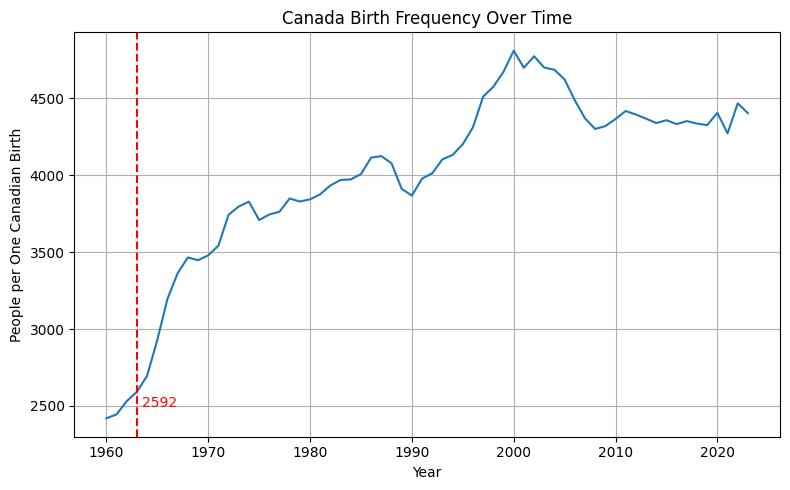

Year: 1963
The chance of being born in Canada in a particular year 1963: 0.0386%
In 1963, for every 2592 people born globally, approximately one was born in Canada.
------


In [105]:
# Show the chance of being born in Canada in a particular year
# table: tbl_maple_roots
import sqlite3

# choice_year = int(input('Enter year between 1960 and 2024:')) or '2020'
while True:
    try:
        choice_year = int(input('Year (1960–2024): ') or 2020)
        if 1960 <= choice_year <= 2024:
            break
    except:
        pass
years = range(1960,2024)
frequencies = []

for year in years:
    quary = f'SELECT c_probability FROM tbl_maple_roots WHERE year={year}'
    conn = sqlite3.connect('mapleroot.db',isolation_level=None)
    probabilty = conn.execute(quary).fetchall()
    conn.close()
    # freq = 1/probabilty[0][0] # this is causing out of range for 2024
    if probabilty and probabilty[0][0] != 0:
        freq = 1 / probabilty[0][0]
    else:
        freq = None  # or you can use np.nan
    frequencies.append(freq)
freq_series = pd.Series(frequencies, index=years)

#plot
plt.figure(figsize=(8, 5))
freq_series.plot(kind='line', title='Canada Birth Frequency Over Time', ylabel='People per One Canadian Birth', xlabel='Year')
plt.axvline(x=choice_year, color='red', linestyle='--', label=f'{choice_year}')
plt.text(choice_year + 0.5, freq_series[choice_year]*0.99, f'{freq_series[choice_year]:.0f}', color='red',fontsize=10,ha='left',va='top')
plt.grid(True)
plt.tight_layout()
plt.show()

#Final Answer
quary = f'SELECT c_probability FROM tbl_maple_roots WHERE year={choice_year}'
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
probabilty = conn.execute(quary).fetchall()
conn.close()
freq = 1/probabilty[0][0]

print(f'Year: {choice_year}')
print(f'The chance of being born in Canada in a particular year {choice_year}: {(probabilty[0][0]*100):.4f}%')
print(f'In {choice_year}, for every {freq:.0f} people born globally, approximately one was born in Canada.')
print('------')
